# Group Members: 
### Usman Manzoor (P19-0068)
### Muhammad Shaheer(P19-0114)

# Subject: Data Science

# Project : Predicting Job Salaries using SVM Classifier 

we predicted salary based on job title, experience level and company size 

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


# Extract, Transform, Load and Data wrangling

## Extraction

In [151]:
salaries = pd.read_csv("ds_salaries.csv")

In [152]:
salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


 ## Data wrangling


In [153]:
salaries.shape

(3755, 11)

In [154]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [155]:
salaries.isnull().sum() # no null values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [156]:
salaries.duplicated().sum() # no duplicated values

1171

In [157]:
salaries.drop(['company_location','remote_ratio'],axis=1,inplace=True)  #uncessory columns deleted

In [158]:
salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,L


## Data visualization

Text(0.5, 1.0, 'JOB Salaries')

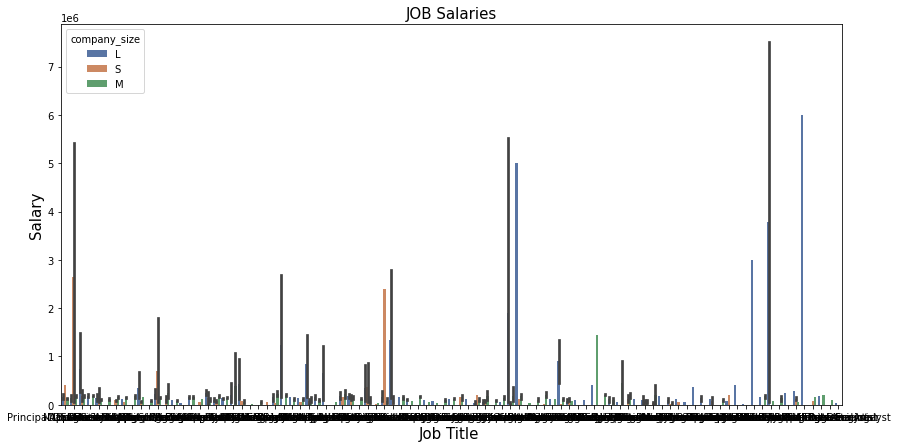

In [159]:
fig = plt.subplots(figsize=(14, 7))
sns.barplot(x=salaries["job_title"], y=salaries["salary"], hue=salaries["company_size"],palette="deep")
plt.xticks(rotation=0);
plt.xlabel("Job Title ", fontsize=15)
plt.ylabel("Salary", fontsize=15)
plt.title("JOB Salaries", fontsize=15)



Text(0.5, 1.0, 'Job Salaries')

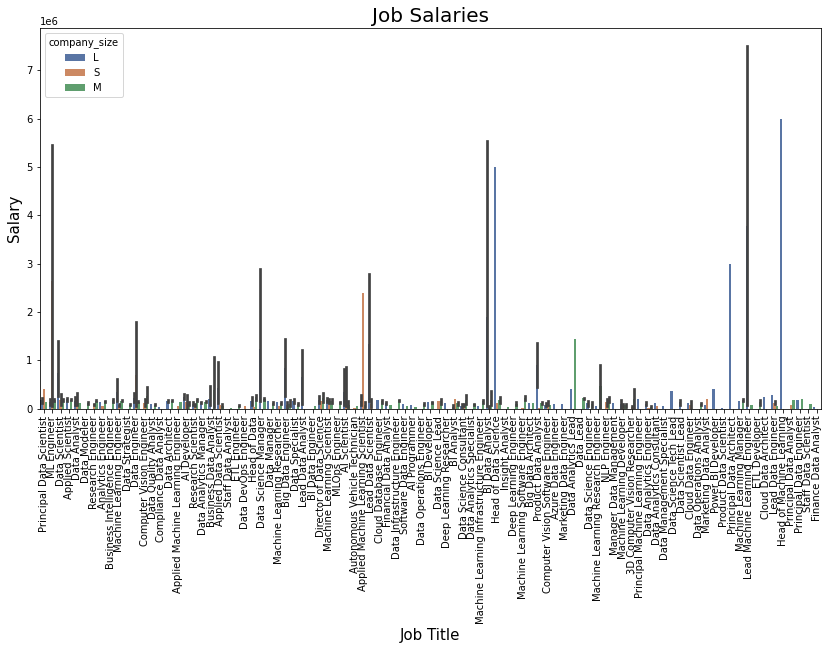

In [160]:
fig = plt.subplots(figsize=(14, 7))
sns.barplot(x=salaries["job_title"], y=salaries["salary"], hue=salaries["company_size"],palette="deep")
plt.xticks(rotation=90);
plt.xlabel("Job Title", fontsize=15)
plt.ylabel("Salary", fontsize=15)
plt.title("Job Salaries", fontsize=20)

In [161]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,M


In [162]:
salaries['salary'][:799].shape

(799,)

In [163]:
salaries.drop(['salary_in_usd','employee_residence','salary_currency', 'employment_type', 'work_year'],axis=1,inplace=True)


In [164]:
salaries

,experience_level,job_title,salary,company_size
0,SE,Principal Data Scientist,80000,L
1,MI,ML Engineer,30000,S
2,MI,ML Engineer,25500,S
3,SE,Data Scientist,175000,M
4,SE,Data Scientist,120000,M
...,...,...,...,...
3750,SE,Data Scientist,412000,L
3751,MI,Principal Data Scientist,151000,L
3752,EN,Data Scientist,105000,S
3753,EN,Business Data Analyst,100000,L


Text(0, 0.5, 'Salary')

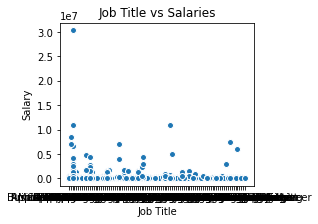

In [165]:
plt.figure(figsize=(16,3))
plt.subplot(1,4,1)
plt.scatter(x = salaries['job_title'],y = salaries['salary'], edgecolors='white')
plt.title('Job Title vs Salaries')
plt.xlabel('Job Title')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

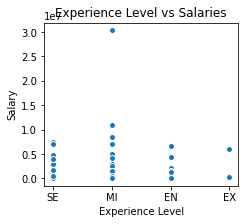

In [166]:
plt.figure(figsize=(16,3))
plt.subplot(1,4,1)
plt.scatter(x=salaries['experience_level'],y=salaries['salary'],edgecolors='white')
plt.title('Experience Level vs Salaries')
plt.xlabel('Experience Level')
plt.ylabel('Salary')

## Choose
As you can see that one  realtion is not enough to predict the Price. So, we have to use Multivarible Model  

In [167]:
salaries.head()

,experience_level,job_title,salary,company_size
0,SE,Principal Data Scientist,80000,L
1,MI,ML Engineer,30000,S
2,MI,ML Engineer,25500,S
3,SE,Data Scientist,175000,M
4,SE,Data Scientist,120000,M


In [169]:
print(salaries.dtypes['experience_level'])
print(salaries.dtypes['job_title'])
print(salaries.dtypes['salary'])
print(salaries.dtypes['company_size'])

object
object
int64
object


In [170]:
salaries['salary'] = salaries['salary'].astype(float)

In [171]:
print(salaries.dtypes['experience_level'])
print(salaries.dtypes['job_title'])
print(salaries.dtypes['salary'])
print(salaries.dtypes['company_size'])

object
object
float64
object


# Machine Learning Model

In [172]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [173]:
le = LabelEncoder()

In [174]:
y = salaries['salary']

In [175]:
x = salaries.drop("salary",axis=1)

In [176]:
le.fit(np.unique(x))
x

,experience_level,job_title,company_size
0,SE,Principal Data Scientist,L
1,MI,ML Engineer,S
2,MI,ML Engineer,S
3,SE,Data Scientist,M
4,SE,Data Scientist,M
...,...,...,...
3750,SE,Data Scientist,L
3751,MI,Principal Data Scientist,L
3752,EN,Data Scientist,S
3753,EN,Business Data Analyst,L


In [177]:
x= pd.DataFrame(le.transform(samp) for samp in x.values)

In [178]:
x

,0,1,2
0,96,89,64
1,70,71,95
2,70,71,95
3,96,47,69
4,96,47,69
...,...,...,...
3750,96,47,64
3751,70,89,64
3752,54,47,95
3753,54,17,64


In [179]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)

In [180]:
y_train.shape

(2816,)

In [181]:
y_test.shape

(939,)

In [182]:
 y_train

1900    142200.0
536     120000.0
3504    100000.0
1947    125000.0
3267     99360.0
          ...   
835     146300.0
3264    102100.0
1653     95000.0
2607    130000.0
2732    180000.0
Name: salary, Length: 2816, dtype: float64

In [183]:
regr = svm.SVR()

In [184]:
regr.fit(X_test, y_test)

SVR()

In [185]:
predict = regr.predict(X_test)

In [186]:
regr.fit(X_train, y_train)

SVR()

In [187]:
X_test # Label Values You can retransform it

,0,1,2
953,96,33,69
2415,70,25,69
3586,70,33,64
2969,54,47,69
3023,70,25,95
...,...,...,...
3155,70,3,64
3613,96,16,69
3149,96,25,69
3383,96,47,69


In [188]:
predict  # Predicted Values

array([140038.2724198 , 139970.13240699, 139979.36354636, 139975.24548091,
       139977.89838539, 140083.25996117, 140038.2724198 , 140038.2724198 ,
       139970.13240699, 140066.20161896, 140083.25996117, 140034.90201913,
       140000.00000126, 140083.25996117, 140038.2724198 , 139977.45354703,
       139996.33839188, 139955.71747509, 139966.32318962, 139977.45354703,
       140057.71778712, 140083.25996117, 140083.25996117, 140025.71007324,
       140038.2724198 , 140038.2724198 , 140038.2724198 , 140039.46983679,
       139975.24548091, 139973.78099146, 140083.25996117, 140038.2724198 ,
       139977.45354703, 140065.96329489, 140000.00000126, 140009.55927288,
       140038.2724198 , 140011.70963111, 140038.2724198 , 140062.77398821,
       140038.2724198 , 140036.10946208, 140063.70902172, 139977.45354703,
       140000.00000126, 140083.25996117, 139977.45354703, 140009.55927288,
       140062.77398821, 140062.77398821, 140039.46983679, 139955.71747509,
       140009.55927288, 1

In [189]:
y_test

953     126000.0
2415    109000.0
3586    200000.0
2969    110000.0
3023    450000.0
          ...   
3155    200000.0
3613     85000.0
3149     90320.0
3383    140000.0
34      184590.0
Name: salary, Length: 939, dtype: float64